Table of Contents:
1. Import libraries & data.
2. Create a static NetworkX graph.  
3. Create an interactive Pyvis network.  
4. Leiden algorithm.
5. Centrality measures (degree, closeness, betweenness).

1. Import libraries & data.

In [1]:
# Import libaries

%matplotlib inline

import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from pyvis.network import Network
from cdlib import algorithms
import seaborn as sns

plt.rcParams["figure.figsize"] = (10, 6)
sns.set(style="whitegrid")

Note: to be able to use all crisp methods, you need to install some additional packages:  {'graph_tool', 'infomap', 'wurlitzer', 'bayanpy'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'pyclustering', 'ASLPAw'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'infomap', 'wurlitzer'}


In [3]:
# Import the country relationships file
df_rel = pd.read_csv("country_relationships_20th_century.csv")

df_rel.head()
df_rel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   source  101 non-null    object
 1   target  101 non-null    object
 2   value   101 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 2.5+ KB


2. Create a static NetworkX graph.

In [4]:
# Create a NetworkX graph from the dataframe

G = nx.from_pandas_edgelist(
    df_rel,
    source="source",
    target="target",
    edge_attr="value",
    create_using=nx.Graph()   # undirected graph
)

print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

Number of nodes: 56
Number of edges: 101


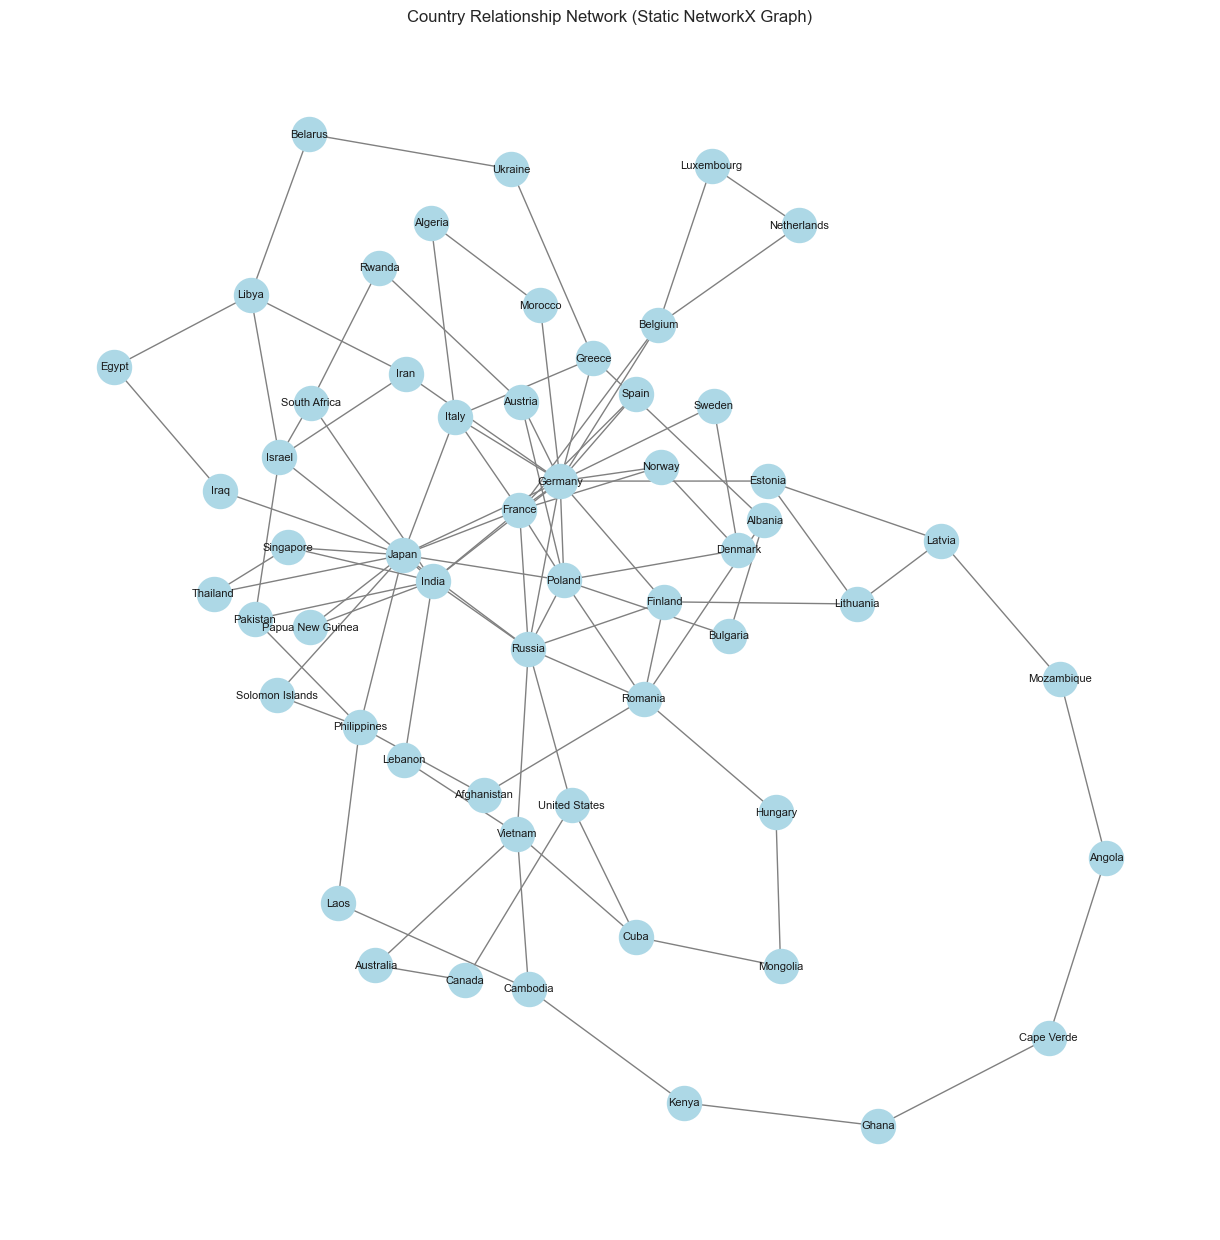

In [5]:
# Create a static NetworkX graph (Matplotlib)

plt.figure(figsize=(12, 12))
pos = nx.kamada_kawai_layout(G)

nx.draw(
    G,
    pos,
    with_labels=True,
    node_color="lightblue",
    node_size=600,
    font_size=8,
    edge_color="gray"
)

plt.title("Country Relationship Network (Static NetworkX Graph)")

plt.savefig("static_country_network.png", dpi=300, bbox_inches="tight")
plt.show()

3. Create an interactive Pyvis network.

In [6]:
# Use degree as a proxy for node size
node_degree = dict(G.degree)
nx.set_node_attributes(G, node_degree, "size")

# Create Pyvis network from NetworkX graph
net = Network(
    notebook=True,
    width="900px",
    height="800px",
    bgcolor="#222222",
    font_color="white"
)

# Load data from G into the Pyvis network
net.from_nx(G)

# Show some control buttons and tweak physics
net.show_buttons(filter_=["physics", "nodes", "edges"])
net.repulsion()

# Save and (in notebook) display HTML
pyvis_file = "countries_network.html"
net.show(pyvis_file)

pyvis_file

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


'countries_network.html'

4. Leiden algorithm.

In [7]:
from cdlib import algorithms

# Run Leiden community detection
coms = algorithms.leiden(G, weights="value")

# Map node -> community
new_com = coms.to_node_community_map()
dict_com = {node: groups[0] for node, groups in new_com.items()}

nx.set_node_attributes(G, dict_com, "group")

In [8]:
# Generate the community-colored Pyvis graph

com_net = Network(
    notebook=True,
    width="1300px",
    height="700px",
    bgcolor="#222222",
    font_color="white"
)

com_net.from_nx(G)
com_net.show_buttons(filter_=["physics", "nodes", "edges"])
com_net.repulsion()

com_net.show("countries_communities_leiden.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


### Community detection with the Leiden Algorithm

Using the Leiden algorithm, the country relationship network was divided into several communities, each represented by a different color in the `countries_communities_leiden.html` visualization. The partition highlights meaningful geopolitical and regional groupings that make sense historically.

#### **Community Observations**

- **European Core Cluster (Blue Group)**  
This community contains countries such as Germany, France, Austria, Poland, Denmark, Norway, and others in Western and Central Europe. These nations share deep historical ties through alliances, conflicts, EU development, and strong economic interdependence. The dense connections reflect their long-standing interactions, especially during and after both World Wars.

- **Asia-Pacific Cluster (Orange Group)**  
Countries such as India, Japan, Singapore, Thailand, Pakistan, the Philippines, and Papua New Guinea fall into this cluster. These nations are heavily connected through 20th-century events including decolonization, regional conflicts, early globalization, and post–World War II restructuring in Asia. Japan's centrality in this cluster reflects its major geopolitical influence during early and mid-20th century.

- **Eastern European / Post-Soviet Cluster (Purple Group)**  
This group includes Romania, Belarus, Hungary, Latvia, Lithuania, Estonia, and others. Historically, these countries were linked through the Soviet sphere of influence, Warsaw Pact membership, or shared geopolitical shifts during and after the Cold War.

- **Middle East & North Africa Cluster (Brown Group)**  
This cluster includes Iran, Iraq, Israel, Libya, Egypt, Rwanda, and others. These countries were shaped heavily by 20th-century regional conflicts, independence movements, and international interventions, which explains their many interconnections.

- **Anglo-American / Pacific Outreach Cluster (Green Group)**  
Countries like the United States, Canada, Australia, Vietnam, and Cuba appear together. This reflects Cold War interactions, American foreign policy, and global influence extending into the Pacific and the Americas. The unusual grouping shows cross-regional relationships tied less to geography and more to international involvement.


The partitions align closely with known geopolitical clusters of the 20th century:
- Western Europe and Central Europe naturally group together due to shared history and dense diplomatic ties.
- Asian nations form a coherent region shaped by post-colonial restructuring and WWII dynamics.
- Eastern European and Baltic nations group as they were strongly linked through the Soviet Union.
- Middle Eastern and African nations cluster around shared regional conflicts and independence movements.
- The U.S.-linked cluster reflects global influence rather than regional adjacency.

#### **Additional Conclusions**

- **Bridge countries**: Nations like Russia, Italy, and France serve as connectors between multiple communities due to their involvement across different regions and historical events.
- **Regional density**: Some clusters are more tightly interconnected (Europe, Asia), reflecting strong regional cohesion.
- **Cross-community edges** represent major historical interactions (wars, treaties, occupations, alliances).

Overall, the Leiden algorithm produced a partition that aligns well with historical geopolitical blocs, helping highlight structural patterns in 20th-century international relationships.

5. Centrality measures (degree, closeness, betweenness).

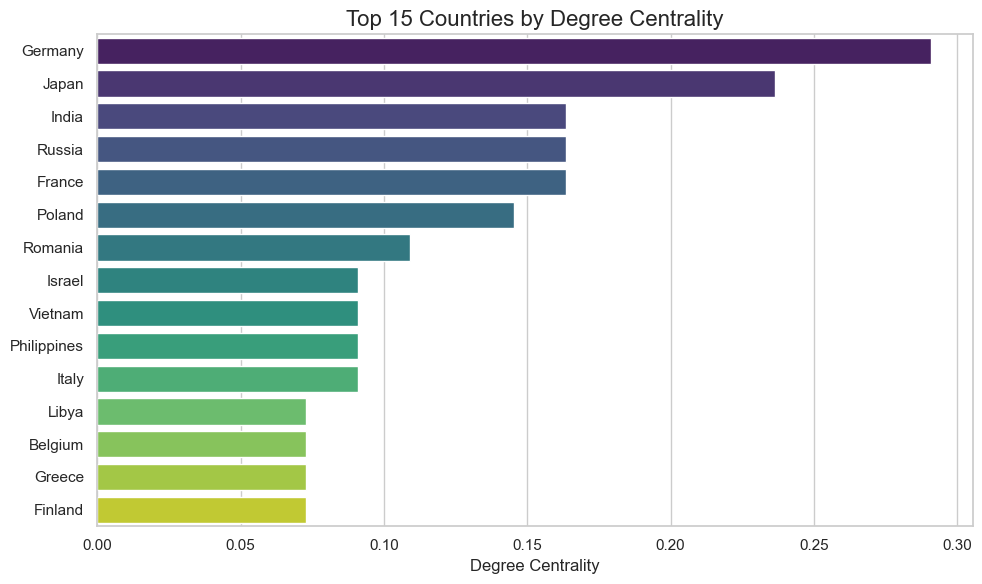

In [10]:
# Degree centrality

# Degree centrality (top 15 for readability)
degree_df_top = degree_df.head(15)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=degree_df_top,
    x="degree_centrality",
    y="country",
    palette="viridis"
)

plt.title("Top 15 Countries by Degree Centrality", fontsize=16)
plt.xlabel("Degree Centrality", fontsize=12)
plt.ylabel("")
plt.tight_layout()
plt.show()

### Degree centrality - observations

Degree centrality measures how many direct connections a country has in the network. It reflects a nation's overall level of interaction with others.

From the visualization, the countries with the highest degree centrality are:

- **Germany**
- **Japan**
- **India**
- **Russia**
- **France**
- **Poland**

These countries appear to be the most connected nodes in the network. This makes sense historically:

- **Germany** served as a major political, military, and economic center in Europe throughout the 20th century.
- **Japan** rose as a major global actor, especially during World War II and the postwar economic boom.
- **India** became a central actor following independence and played a key diplomatic role in Asia and the Non-Aligned Movement.
- **Russia** (formerly the USSR) was a major superpower, heavily influencing political, military, and economic relationships globally.
- **France** maintained extensive connections through colonial history, alliances, and European cooperation.
- **Poland**, positioned between major powers in Europe, has historically been a geopolitical crossroads, leading to numerous alliances and conflicts that increased its connectivity within the region.


Countries ranked lower have fewer direct international relationships in the dataset and tend to be either geographically isolated, regionally focused, or historically less involved in global events.

Overall, the degree centrality results align closely with historical patterns: major world powers and diplomatically active countries appear as the highest-degree nodes.

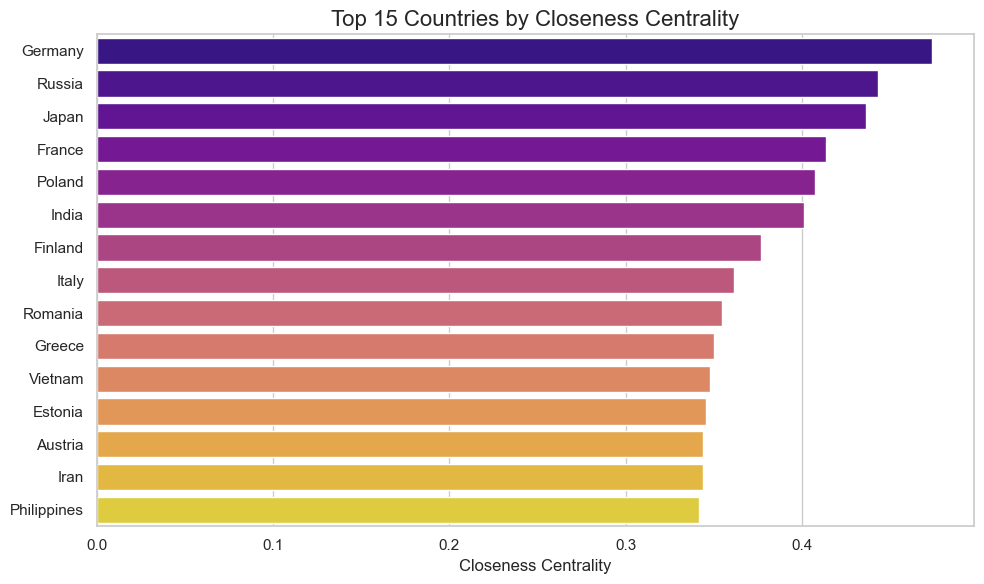

In [11]:
# Closeness centrality

closeness_dict = nx.closeness_centrality(G)

closeness_df = (
    pd.DataFrame(closeness_dict.items(), columns=["country", "closeness_centrality"])
    .sort_values("closeness_centrality", ascending=False)
)

# Show top 15 for readability
closeness_df_top = closeness_df.head(15)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=closeness_df_top,
    x="closeness_centrality",
    y="country",
    palette="plasma"
)
plt.title("Top 15 Countries by Closeness Centrality", fontsize=16)
plt.xlabel("Closeness Centrality", fontsize=12)
plt.ylabel("")
plt.tight_layout()
plt.show()

### Closeness centrality – observations

Closeness centrality measures how quickly a country can reach all other countries in the network using the shortest paths. Countries with high closeness are positioned near the “center” of the network structure and can theoretically spread information or influence more efficiently.

From the results, the countries with the highest closeness centrality are:

- **Germany**  
- **Russia**  
- **Japan**  
- **France**  
- **Poland**  
- **India**  
- **Finland**  
- **Italy**  

These countries are geographically or diplomatically well-positioned within the network:

- **Germany** ranks first, reflecting its central role in European geopolitics, extensive alliances, and interactions across multiple regions during the 20th century.
- **Russia’s** high closeness stems from its influence spanning Europe and Asia, especially during the Soviet era.
- **Japan** maintains strong international ties across Asia and the Pacific, especially post–World War II.
- **France** has long-standing relationships across Europe, Africa, and former colonies, contributing to a short average path to other nations.
- **Poland** appears again as a central connector, reflecting its historical role as a bridge between Western and Eastern Europe.
- **India**'s position reflects its role as a major actor in South Asia and the Non-Aligned Movement.
- **Finland** and **Italy** also appear as central nodes due to their ties across European clusters.

Countries lower on the list—such as Iran, Austria, Estonia, and Vietnam—are still influential within their regions but have fewer short paths to the entire network.

Overall, the closeness centrality results confirm that countries with broad geopolitical influence or geographically strategic locations tend to be most efficiently connected across the global network.

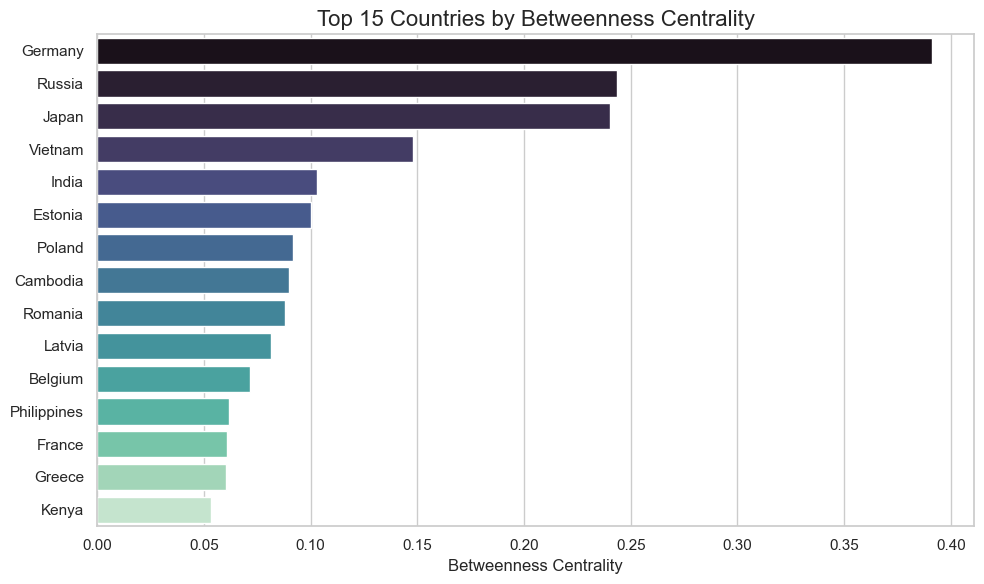

,country,betweenness_centrality
2,Germany,0.391251
1,Russia,0.243573
24,Japan,0.240214
52,Vietnam,0.147979
31,India,0.102984
7,Estonia,0.100208
6,Poland,0.091612
38,Cambodia,0.089764
44,Romania,0.087814
8,Latvia,0.081246


In [12]:
# Betweenness centrality

betweenness_dict = nx.betweenness_centrality(G, normalized=True)

betweenness_df = (
    pd.DataFrame(betweenness_dict.items(), columns=["country", "betweenness_centrality"])
    .sort_values("betweenness_centrality", ascending=False)
)

# Show top 15 for readability
betweenness_df_top = betweenness_df.head(15)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=betweenness_df_top,
    x="betweenness_centrality",
    y="country",
    palette="mako"
)
plt.title("Top 15 Countries by Betweenness Centrality", fontsize=16)
plt.xlabel("Betweenness Centrality", fontsize=12)
plt.ylabel("")
plt.tight_layout()
plt.show()

betweenness_df_top

### Betweenness centrality - observations

Betweenness centrality identifies countries that act as “bridges” or intermediaries in the global network — those that frequently lie on the shortest paths between other nations. High betweenness indicates geopolitical importance, strategic location, or a history of diplomatic connections across regions.

From the results, the top bridge countries are:

- **Germany** (extremely high betweenness)
- **Russia**
- **Japan**
- **Vietnam**
- **India**
- **Estonia**
- **Poland**

#### Key interpretations

**1. Germany stands out significantly.**  
With a betweenness score far higher than any other country, Germany appears to be the main connector across multiple communities.  
Historically, Germany’s central location in Europe, participation in both major world wars, Cold War division, reunification, and economic leadership give it deep ties across Western Europe, Eastern Europe, and beyond.

**2. Russia and Japan follow as major intermediaries.**  
- **Russia** connects Europe and Asia, reflecting its involvement in Soviet-era alliances, conflicts, and global power dynamics.  
- **Japan** bridges Asian, Pacific, and Western networks, especially through its historical military expansions and later economic partnerships.

**3. Vietnam has surprisingly high betweenness.**  
Vietnam acts as a connector in Southeast Asia due to its involvement in major 20th-century conflicts (e.g., the Vietnam War), which pulled multiple global powers into its sphere.

**4. India’s position highlights its role as a regional and global mediator.**  
Its ties to South Asia, its leadership in the Non-Aligned Movement, and its relations with both Western and Eastern blocs increase its cross-network influence.

**5. Estonia, Poland, Latvia, and Romania appear as European bridge states.**  
These countries often sit geographically and politically between major powers — for example, between Russia and Western Europe.

**6. Western European nations like Belgium and France rank lower than expected.**  
Unlike Germany, they do not function as “shortest-path bridges” in this dataset, even though they have many direct connections. This shows their relationships are more clustered rather than spanning between clusters.

**7. Kenya's appearance at the bottom of the top 15 suggests a role linking African and global relations**, despite having fewer overall connections.

### **Summary**

Betweenness centrality reveals the most strategically important “gateway” countries rather than the most connected ones. Germany’s dominance in this measure is consistent with its political, geographic, and economic role across the 20th century. Countries like Russia, Japan, Vietnam, and India also emerge as key intermediaries, each reflecting significant historical and geopolitical pathways.